In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, add_image
import matplotlib.patches as mpatches
import shapely.geometry as geom
from PIL import Image
from urllib.request import urlopen

In [2]:
STATSBOMB = os.path.join('..', 'data', 'statsbomb')
df_event = pd.read_parquet(os.path.join(STATSBOMB, 'event.parquet'))

Pitch setup

In [14]:
pitch = Pitch(line_zorder=3, figsize=(16, 9), line_color='black')

Pass angles

In [9]:
df_pass = df_event[df_event.type_name == 'Pass'].copy()
x_dist = df_pass.end_x - df_pass.x
y_dist = df_pass.end_y - df_pass.y
pass_radians = np.arctan2(y_dist, x_dist)

Arrows

In [10]:
bs_angle = pitch.bin_statistic(df_pass.x, df_pass.y, values=pass_radians, statistic='mean', bins=(10, 10))
h = 5
changey = (np.sin(bs_angle['statistic']) * h).ravel()
changex = (np.cos(bs_angle['statistic']) * h).ravel()
endx = bs_angle['cx'].ravel() + changex
endy = bs_angle['cy'].ravel() + changey
startx = bs_angle['cx'].ravel()
starty = bs_angle['cy'].ravel()

Heatmap

In [11]:
bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=(10, 10))

In [13]:
Draw pitchm

SyntaxError: invalid syntax (<ipython-input-13-514bb53af4c3>, line 1)

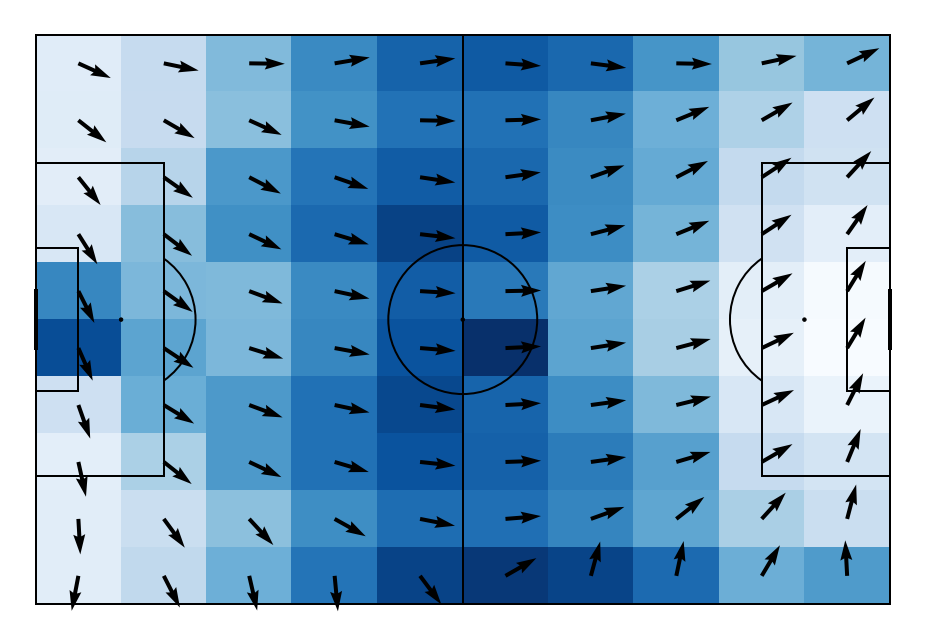

In [15]:
fig, ax = pitch.draw()
pitch.arrows(startx, starty, endx, endy, ax=ax, zorder=3)
pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')